In [1]:
se_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/SE.rds"
out_peaks_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.csv"
out_peaks_fig_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf"

In [2]:
#BiocManager::install("annotatr")
library("annotatr")
library("Signac")
library("Seurat")

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp



In [3]:
annots_order = c(
    'hg38_genes_1to5kb',
    'hg38_genes_promoters',
    'hg38_genes_5UTRs',
    'hg38_genes_exons',
    'hg38_genes_intronexonboundaries',
    'hg38_genes_introns',
    'hg38_genes_3UTRs',
    'hg38_genes_intergenic')

In [4]:
se <- readRDS(se_f)
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<int>,<chr>,<I<chr>>,<fct>,<fct>,<fct>,<fct>
Flt3l_AAACGAAAGGAGACTC-1,Flt3l,531,531,2286,298,7,7,124,749,1101,⋯,1,1,649,621,AAACGAAAGGAGACTC-1_Flt3l,Flt3l_AAACGAAAGGAGACTC-1,7,1,Flt3l,1_7
Flt3l_AAACGAAAGTCACGCC-1,Flt3l,1222,1222,4711,555,16,12,289,853,2986,⋯,3,3,1674,1502,AAACGAAAGTCACGCC-1_Flt3l,Flt3l_AAACGAAAGTCACGCC-1,12,1,Flt3l,1_12
Flt3l_AAACGAACAAGACTAA-1,Flt3l,2225,2225,9178,1509,37,19,585,1339,5689,⋯,1,1,3369,2695,AAACGAACAAGACTAA-1_Flt3l,Flt3l_AAACGAACAAGACTAA-1,20,1,Flt3l,1_20
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,⋯,5,5,3360,2784,AAACGAACAAGCGAAC-1_Flt3l,Flt3l_AAACGAACAAGCGAAC-1,8,0,Flt3l,0_8
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,⋯,9,9,3722,2998,AAACGAACACAGCCAC-1_Flt3l,Flt3l_AAACGAACACAGCCAC-1,27,0,Flt3l,0_27
Flt3l_AAACGAACACAGGTAG-1,Flt3l,615,615,2384,240,13,7,149,594,1381,⋯,3,3,901,865,AAACGAACACAGGTAG-1_Flt3l,Flt3l_AAACGAACACAGGTAG-1,8,0,Flt3l,0_8
Flt3l_AAACGAACACAGTAGG-1,Flt3l,2545,2545,10019,1869,31,28,514,1008,6569,⋯,1,1,3950,3101,AAACGAACACAGTAGG-1_Flt3l,Flt3l_AAACGAACACAGTAGG-1,2,1,Flt3l,1_2
Flt3l_AAACGAACATAGAATG-1,Flt3l,985,985,3395,433,8,20,163,985,1786,⋯,4,4,1090,1005,AAACGAACATAGAATG-1_Flt3l,Flt3l_AAACGAACATAGAATG-1,8,0,Flt3l,0_8
Flt3l_AAACGAACATGTAGAA-1,Flt3l,1020,1020,5086,708,5,21,243,1777,2332,⋯,1,1,1347,1237,AAACGAACATGTAGAA-1_Flt3l,Flt3l_AAACGAACATGTAGAA-1,0,1,Flt3l,1_0


In [5]:
# Select annotations for intersection with regions
# Note inclusion of custom annotation, and use of shortcuts
annots = c('hg38_cpgs', 'hg38_basicgenes', 'hg38_genes_intergenic',
           'hg38_genes_intronexonboundaries')

# Build the annotations (a single GRanges object)
annotations = build_annotations(genome = 'hg38', annotations = annots)

Loading required package: GenomicFeatures

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked from ‘package:sp’:

    %over%


Loading required package

In [6]:
DefaultAssay(se) <- "ATAC"
dm_regions = granges(se, use.names = TRUE, use.mcols = FALSE)
dm_regions 


GRanges object with 193888 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1        9866-10638      *
       [2]     chr1     180724-181403      *
       [3]     chr1     184126-184527      *
       [4]     chr1     191059-192097      *
       [5]     chr1     267765-268275      *
       ...      ...               ...    ...
  [193884]     chrY 21214026-21214123      *
  [193885]     chrY 21254509-21254848      *
  [193886]     chrY 21459911-21460270      *
  [193887]     chrY 21580389-21580825      *
  [193888]     chrY 56727981-56728332      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [7]:
library("ggplot2")

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”


In [8]:
# Intersect the regions we read in with the annotations
dm_annotated = annotate_regions(
    regions = dm_regions,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = FALSE)
# A GRanges object is returned
print(dm_annotated)

Annotating...



GRanges object with 2165174 ranges and 1 metadata column:
            seqnames            ranges strand |                    annot
               <Rle>         <IRanges>  <Rle> |                <GRanges>
        [1]     chr1        9866-10638      * |        chr1:6869-10868:+
        [2]     chr1        9866-10638      * |        chr1:7010-11009:+
        [3]     chr1        9866-10638      * |           chr1:1-24734:*
        [4]     chr1     180724-181403      * |     chr1:177696-181695:+
        [5]     chr1     180724-181403      * |     chr1:139564-195250:*
        ...      ...               ...    ... .                      ...
  [2165170]     chrY 21459911-21460270      * | chrY:21408979-21507152:*
  [2165171]     chrY 21580389-21580825      * | chrY:21571157-21583520:-
  [2165172]     chrY 21580389-21580825      * | chrY:21538993-21890411:*
  [2165173]     chrY 56727981-56728332      * | chrY:26639653-56850243:*
  [2165174]     chrY 56727981-56728332      * | chrY:26631398-5706

In [9]:
# Coerce to a data.frame
df_dm_annotated = data.frame(dm_annotated)
# See the GRanges column of dm_annotaed expanded
print(head(df_dm_annotated))

  seqnames  start    end width strand annot.seqnames annot.start annot.end
1     chr1   9866  10638   773      *           chr1        6869     10868
2     chr1   9866  10638   773      *           chr1        7010     11009
3     chr1   9866  10638   773      *           chr1           1     24734
4     chr1 180724 181403   680      *           chr1      177696    181695
5     chr1 180724 181403   680      *           chr1      139564    195250
6     chr1 184126 184527   402      *           chr1      183981    184174
  annot.width annot.strand  annot.id       annot.tx_id annot.gene_id
1        4000            +  1to5kb:1 ENST00000456328.2     100287102
2        4000            +  1to5kb:2 ENST00000450305.2     100287102
3       24734            *   inter:1              <NA>          <NA>
4        4000            + 1to5kb:12 ENST00000624431.2     102725121
5       55687            *   inter:3              <NA>          <NA>
6         194            +   exon:31 ENST00000624431.2     10

In [10]:
# Find the number of regions per annotation type
dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)

# Count the occurrences of classifications in the DM_status
# column across the annotation types.
dm_catsum = summarize_categorical(
    annotated_regions = dm_annotated,
    by = c('annot.type'),
    quiet = TRUE)
print(dm_catsum)

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


In [11]:
write.csv(dm_catsum, out_peaks_f, quote=FALSE, row.names = FALSE)

Saving 6.67 x 6.67 in image



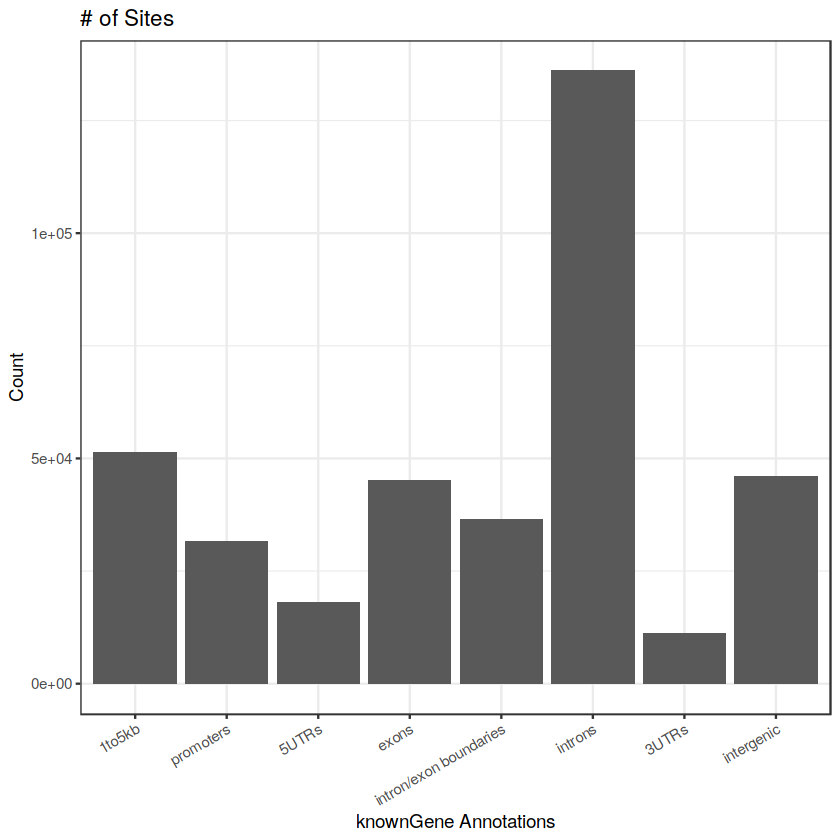

In [12]:
# View the number of regions per annotation. This function
# is useful when there is no classification or data
# associated with the regions.

dm_vs_kg_annotations = plot_annotation(
    annotated_regions = dm_annotated,
    annotation_order = annots_order,
    plot_title = '# of Sites',
    x_label = 'knownGene Annotations',
    y_label = 'Count')

ggsave(out_peaks_fig_f)
print(dm_vs_kg_annotations)

## Break by cluster

In [13]:
colnames(se[[]])

[1] "orig.ident"                       "nCount_ATAC"                     
 [3] "nFeature_ATAC"                    "total"                           
 [5] "duplicate"                        "chimeric"                        
 [7] "unmapped"                         "lowmapq"                         
 [9] "mitochondrial"                    "passed_filters"                  
[11] "cell_id"                          "is__cell_barcode"                
[13] "TSS_fragments"                    "DNase_sensitive_region_fragments"
[15] "enhancer_region_fragments"        "promoter_region_fragments"       
[17] "on_target_fragments"              "blacklist_region_fragments"      
[19] "peak_region_fragments"            "peak_region_cutsites"            
[21] "proj"                             "nucleosome_signal"               
[23] "nucleosome_percentile"            "TSS.enrichment"                  
[25] "TSS.percentile"                   "pct_reads_in_peaks"              
[27] "blacklist_ratio"                  "high.tss"                        
[29] "nucleosome_group"                 "ATAC_snn_res.0.8"                
[31] "seurat_clusters"                  "nCount_RNA"                      
[33] "nFeature_RNA"                     "ID"                              
[35] "Row.names"                        "lineage"                         
[37] "donor"                            "condition"                       
[39] "name"

In [14]:
summary.cluster <- function(cl, se){
    se.filt = subset(se, seurat_clusters==cl)
    dm_regions = granges(se.filt, use.names = TRUE, use.mcols = FALSE)

    # Intersect the regions we read in with the annotations
    dm_annotated = annotate_regions(
        regions = dm_regions,
        annotations = annotations,
        ignore.strand = TRUE,
        quiet = FALSE)

    # A GRanges object is returned
    #print(dm_annotated)

    # Coerce to a data.frame
    df_dm_annotated = data.frame(dm_annotated)
    
    # See the GRanges column of dm_annotaed expanded
    #print(head(df_dm_annotated))

    # Find the number of regions per annotation type
    dm_annsum = summarize_annotations(
        annotated_regions = dm_annotated,
        quiet = TRUE)

    # Count the occurrences of classifications in the DM_status
    # column across the annotation types.
    dm_catsum = summarize_categorical(
        annotated_regions = dm_annotated,
        by = c('annot.type'),
        quiet = TRUE)
    
    print(dm_catsum)

    #     View the number of regions per annotation. This function
    #     is useful when there is no classification or data
    #     associated with the regions.
    dm_vs_kg_annotations = plot_annotation(
        annotated_regions = dm_annotated,
        annotation_order = annots_order,
        plot_title = '# of Sites',
        x_label = 'knownGene Annotations',
        y_label = 'Count')

    #ggsave(out_peaks_fig_f)
    print(dm_vs_kg_annotations)
    #out_peaks_fig_f
    write.csv(dm_catsum, paste0(out_peaks_f, "_cluster_", cl, ".csv"), quote=FALSE, row.names = FALSE)
        ggsave(paste0(out_peaks_fig_f, "_cluster_", cl, ".png"))

}

Annotating...



# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



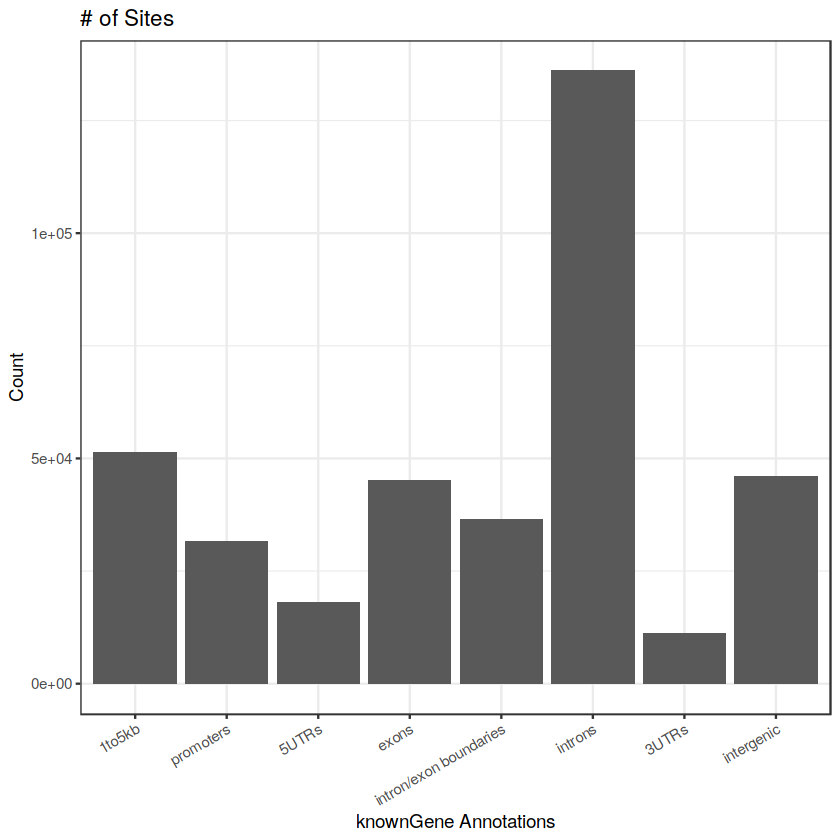

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



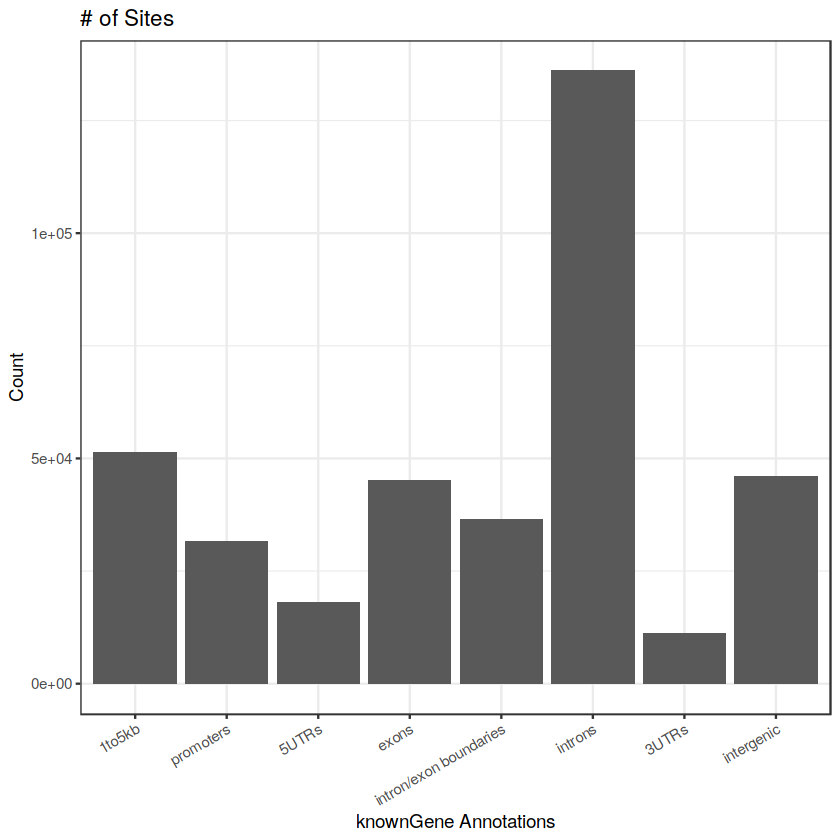

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



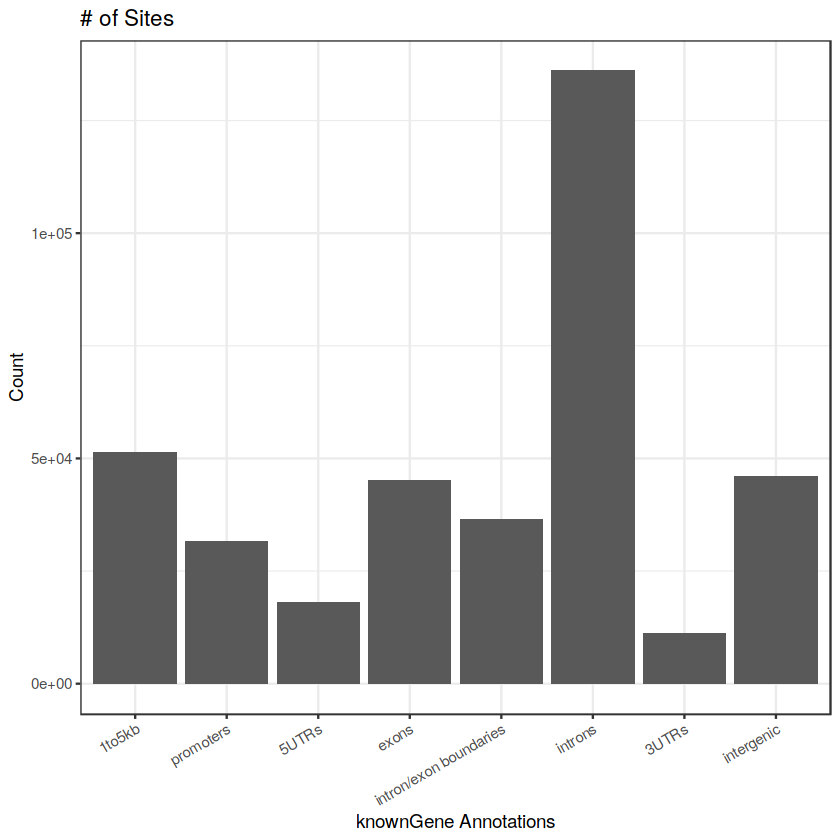

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



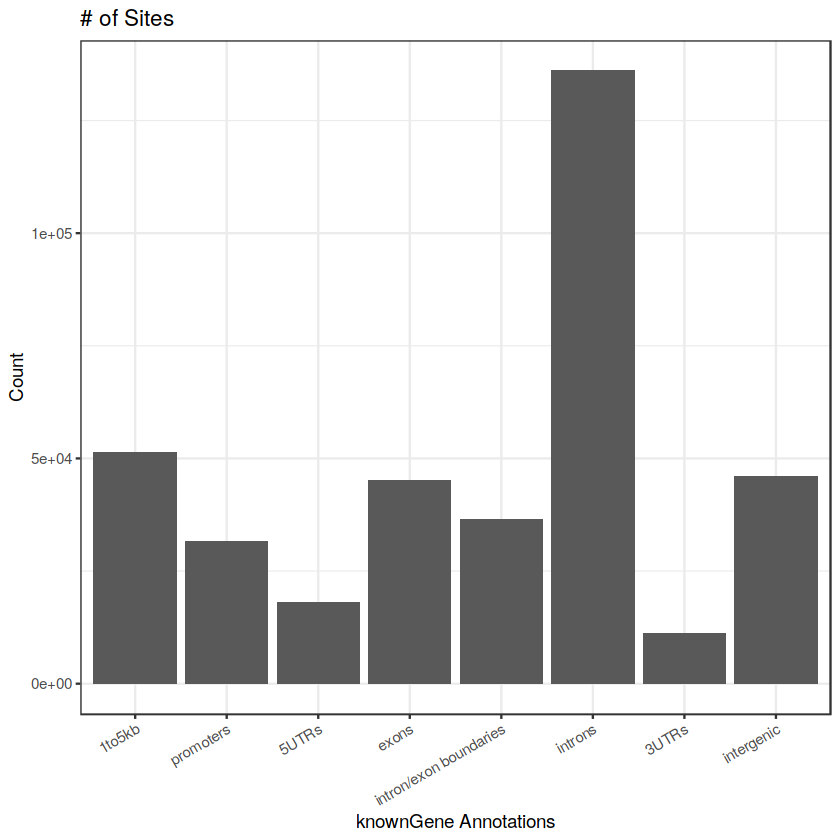

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



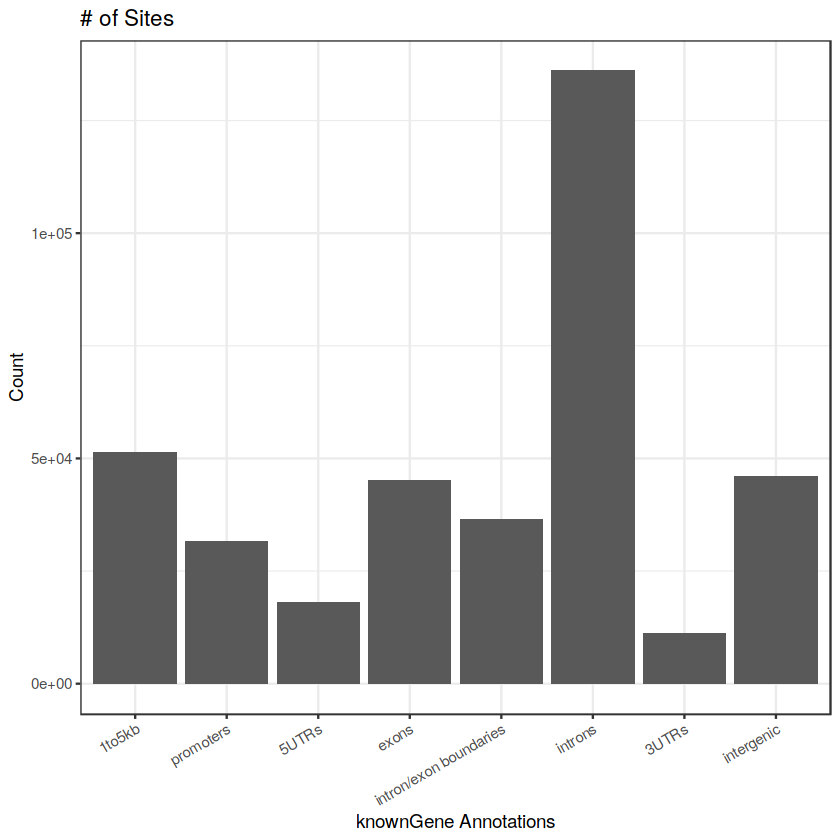

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



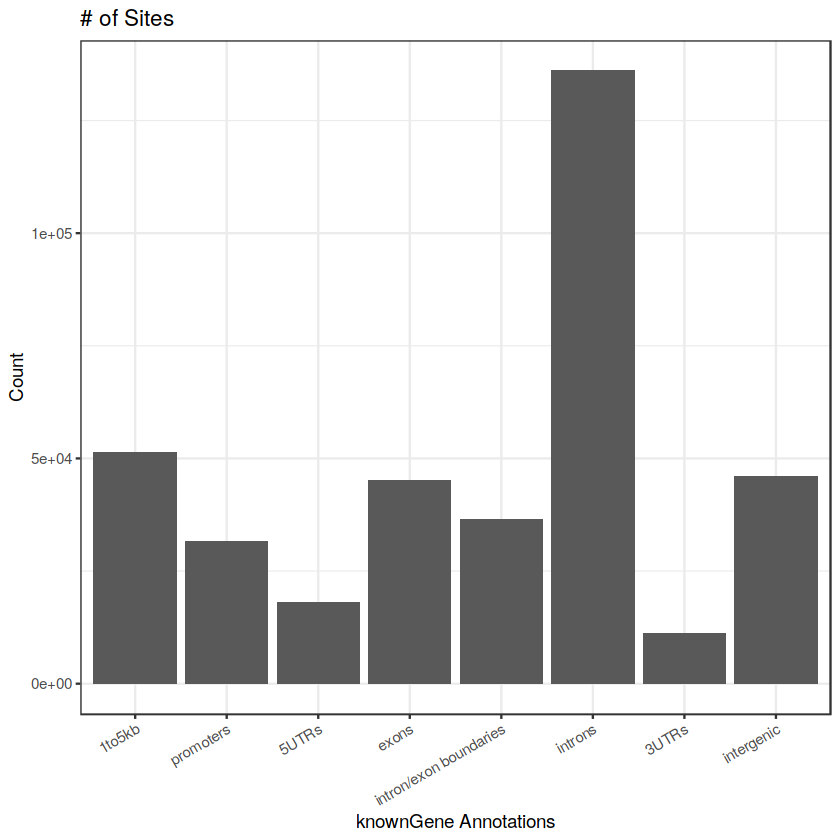

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



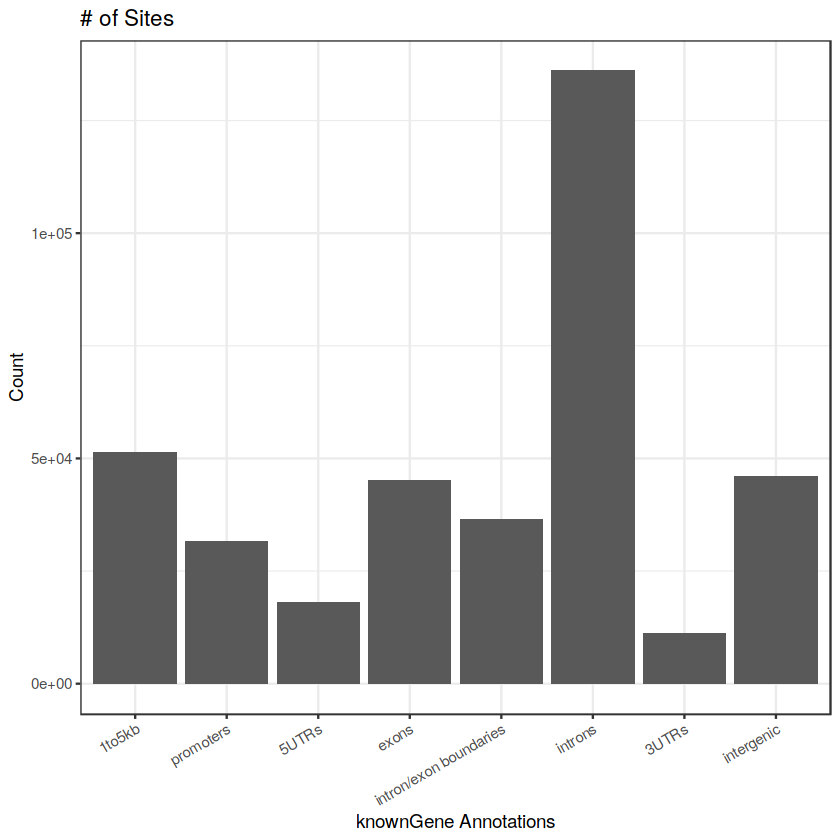

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



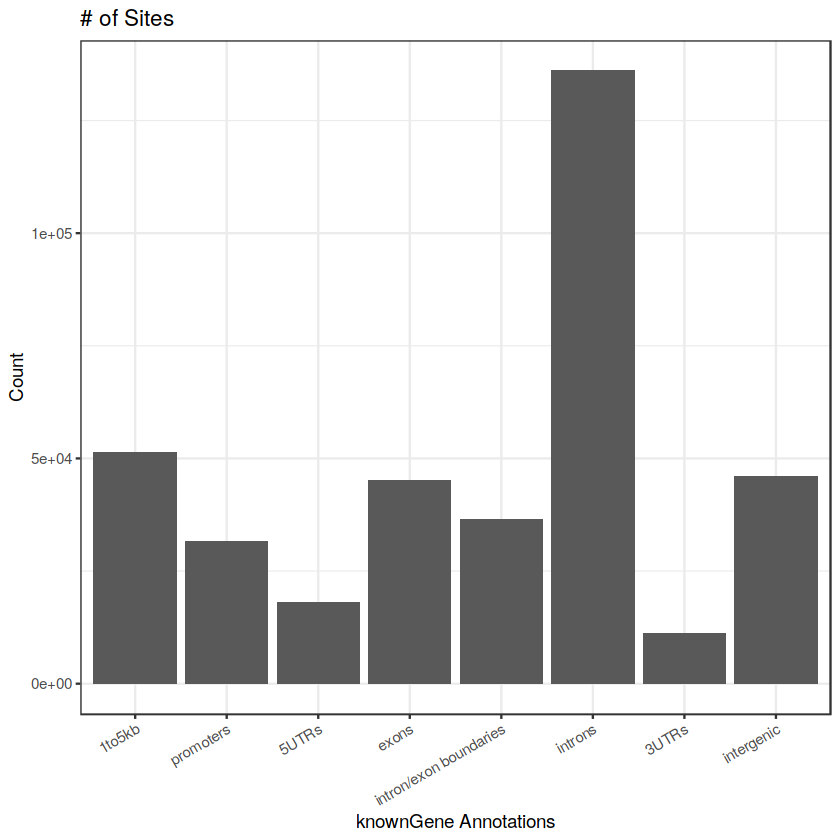

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



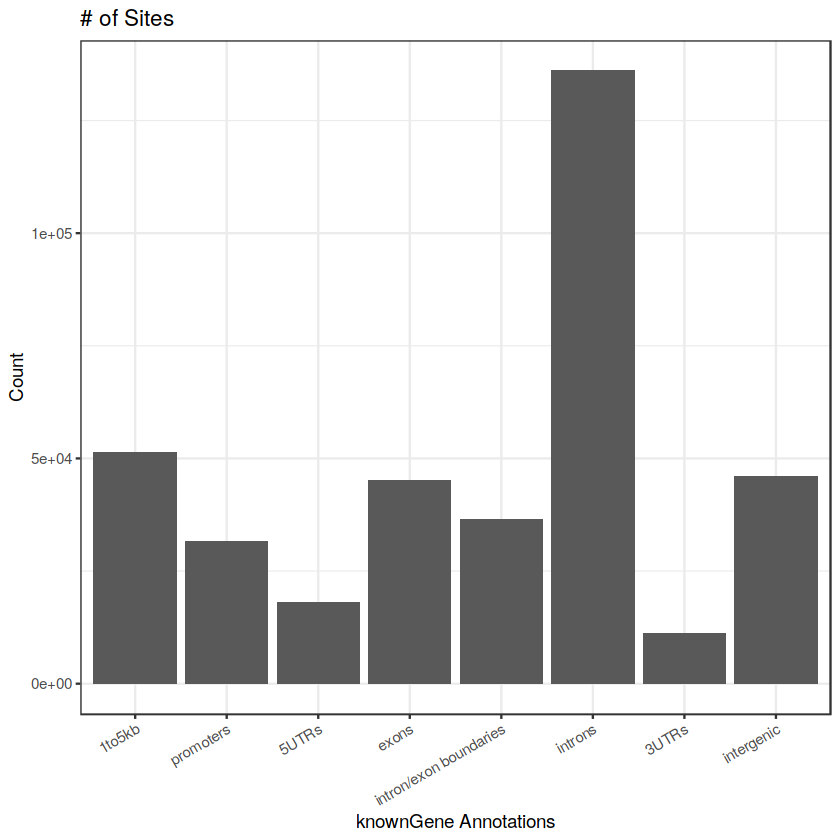

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image

Annotating...



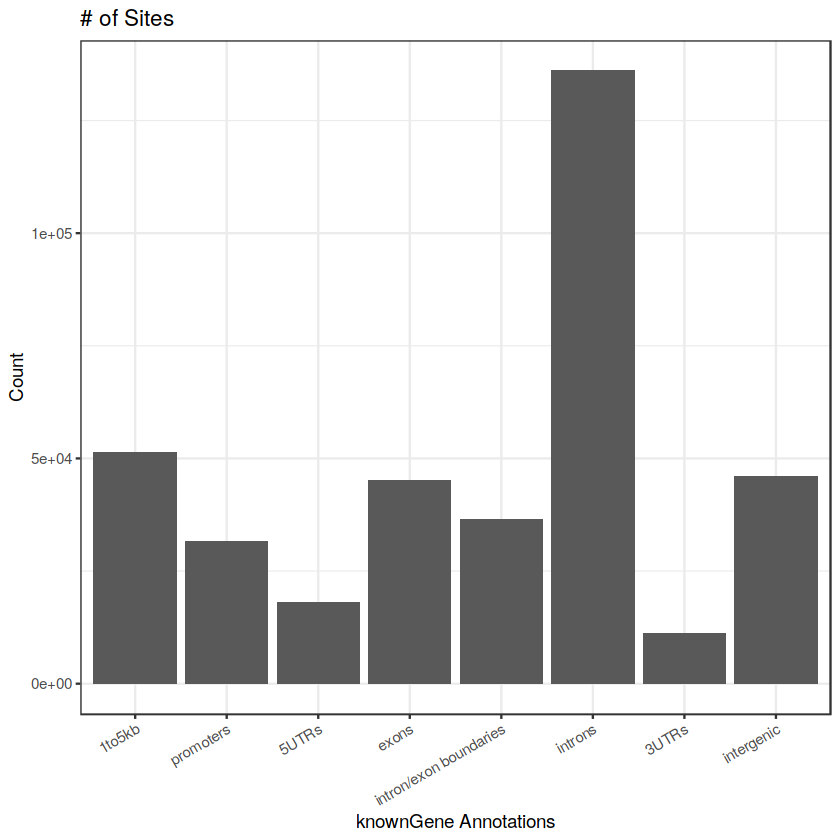

# A tibble: 12 × 2
   annot.type                           n
   <chr>                            <int>
 1 hg38_cpg_inter                  160743
 2 hg38_cpg_islands                 17868
 3 hg38_cpg_shelves                 16793
 4 hg38_cpg_shores                  26076
 5 hg38_genes_1to5kb                51307
 6 hg38_genes_3UTRs                 11100
 7 hg38_genes_5UTRs                 18036
 8 hg38_genes_exons                 45189
 9 hg38_genes_intergenic            45912
10 hg38_genes_intronexonboundaries  36462
11 hg38_genes_introns              136017
12 hg38_genes_promoters             31632


Saving 6.67 x 6.67 in image



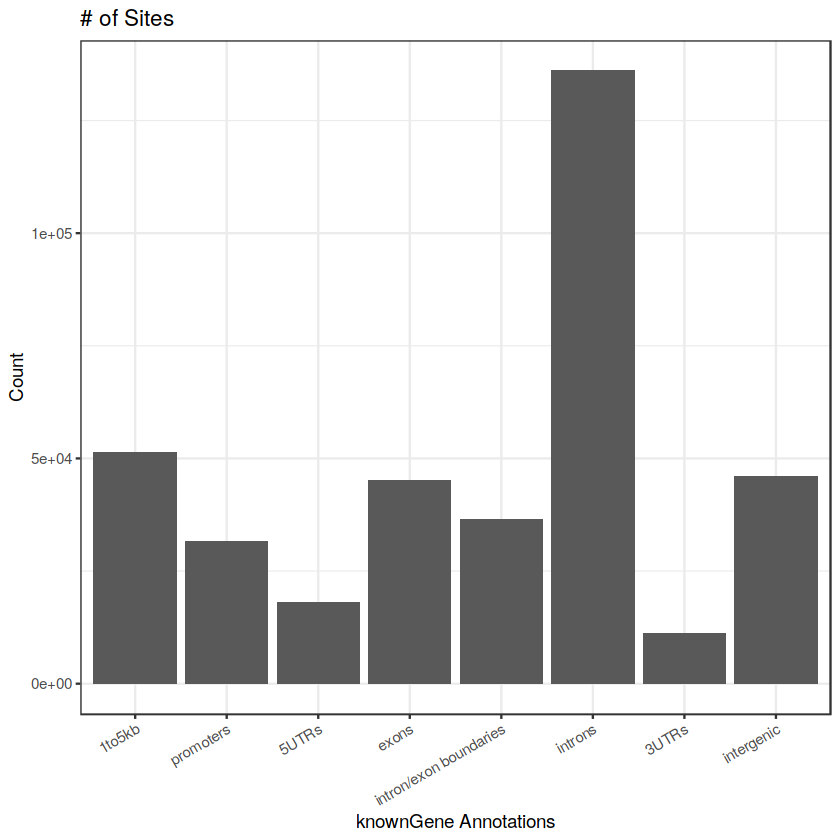

[1] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_1.png" 
 [2] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_3.png" 
 [3] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_5.png" 
 [4] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_9.png" 
 [5] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_4.png" 
 [6] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_6.png" 
 [7] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_8.png" 
 [8] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_2.png" 
 [9] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_10.png"
[10] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_0.png" 
[11] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_7.png" 
[12] "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/peaks/peaks.summary.pdf_cluster_11.png"

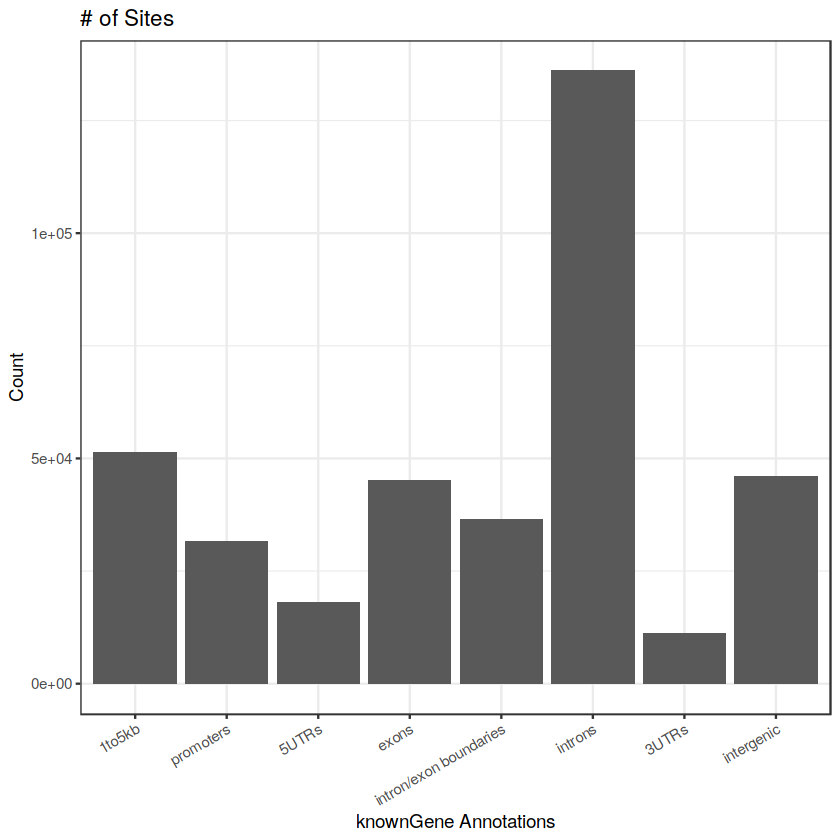

In [15]:
sapply(unique(se$seurat_clusters), summary.cluster, se)